In [1]:


from __future__ import unicode_literals

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import seaborn as sns
import codecs
import re
from objectives import *
from read_input import *
from matplotlib import cm
from plotting import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

PYTHONIOENCODING="utf-8"

%matplotlib inline
set_scenario_files("scenario3", "set1")

C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


weighting corpora
weighting corpora
weighting corpora


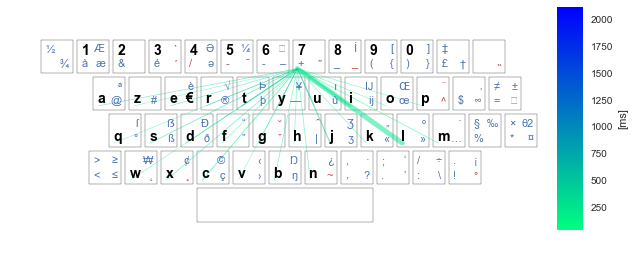

In [5]:

def draw_lines(ax, mapping, c, p_bigram):
    cmap = mpl.cm.winter_r
    
    min_thick = 0.5 
    max_thick = 5
        
    #box dimensions
    key_height = 4
    key_width = 4
    
    #text positions
    pos_normal_x = 0.5
    pos_normal_y = 0.5
    pos_shift_x = 0.5
    pos_shift_y = key_height-0.5
    pos_alt_x = key_width-0.5
    pos_alt_y = 0.5
    pos_alt_shift_x = key_width-0.5
    pos_alt_shift_y = key_height-0.5
    
    #keyboard specifics
    row_distance = 0.5
    column_distance = 0.5
    row_shift = {'A':0, 'B':0, 'C':key_width/2, 'D':key_width, 'E':3*key_width/2}
    
    row_numbers = {u"A":0, u"B":1, u"C":2, u"D":3, u"E":4}
    
    performance = get_performance(normalize=0)
    azerty = get_azerty()
    
    performances = {}
    bigrams = {}
    for l in get_letters():
        if not l=="space":
            s=mapping[c]
            
            bigrams[l] = p_bigram[(c,l)] + p_bigram[(l,c)] 
            if bigrams[l] >0:
                performances[l] = 1000*(
                    (p_bigram[(c,l)] / bigrams[l])*performance[(s,azerty[l])] + 
                    (p_bigram[(l,c)] / bigrams[l])*performance[(azerty[l],s)] 
                )
    performances["min"] = np.min(performance.values())*1000
    performances["max"] = np.max(performance.values())*1000
    #normalize between 0 and 1
    performances_norm = normalize_dict_values(performances)
    bigrams = normalize_dict_values(bigrams)
    
    #coordinates character:
    slot = mapping[c]             
    row = row_numbers[slot[0]]
    column = int(slot[1:3])
    level = slot[4:]

    if level == "":
        pos_x = pos_normal_x
        pos_y = pos_normal_y
    if level == "Shift":
        pos_x = pos_shift_x
        pos_y = pos_shift_y
    if level == "Alt":
        pos_x = pos_alt_x
        pos_y = pos_alt_y
    if level == "Alt_Shift":
        pos_x = pos_alt_shift_x
        pos_y = pos_alt_shift_y

    x_c = (column*key_width)+column*column_distance + pos_x - row_shift[slot[0]]
    y_c = (row*key_height) + row*row_distance + pos_y

    for l in get_letters():
        if not l=="space" and l in performances_norm:
            color = cmap(int(np.round(performances_norm[l]*255)))
            color = [color[0], color[1],color[2], 0.5]
            thickness = min_thick + ((max_thick - min_thick)*bigrams[l])
            
            slot = azerty[l]           
            row = row_numbers[slot[0]]
            column = int(slot[1:3])
            level = slot[4:]

            if level == "":
                pos_x = pos_normal_x
                pos_y = pos_normal_y
            if level == "Shift":
                pos_x = pos_shift_x
                pos_y = pos_shift_y
            if level == "Alt":
                pos_x = pos_alt_x
                pos_y = pos_alt_y
            if level == "Alt_Shift":
                pos_x = pos_alt_shift_x
                pos_y = pos_alt_shift_y

            x_l = (column*key_width)+column*column_distance + pos_x - row_shift[slot[0]] + 0.1
            y_l = (row*key_height) + row*row_distance + pos_y

            ax.plot([x_l, x_c], [y_l, y_c], color=color, linewidth=thickness)
            
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    
    norm = mpl.colors.Normalize(vmin=np.min(performances.values()), vmax=np.max(performances.values()))

    # ColorbarBase derives from ScalarMappable and puts a colorbar
    # in a specified axes, so it has everything needed for a
    # standalone colorbar.  There are many more kwargs, but the
    # following gives a basic continuous colorbar with ticks
    # and labels.
    cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    cb1.set_label('[ms]')

def plot_mapping_with_lines(mapping, character, plotname="",                 
                 corpus_weights=-1):
    """
    Given a mapping and a character, highlight the performance score of that character. Draw a line between that character and all
    fixed characters. The color shows how fast it is, the thickness how frequent that bigram.
    """
    
    
    if type(mapping)==str or type(mapping)==unicode:
        if mapping.split(".")[-1] == "mst":
            mapping, obj = create_map_from_reformulation(mapping)
        elif mapping.split(".")[-1] == "txt":
            mapping = create_map_from_txt(mapping)
        
    p_single, p_bigram = get_probabilities(corpus_weights)
    azerty = get_azerty()    
    numbers = get_fixed_characters()    
    letters = get_letters()
        
    with open('input\\all_slots.txt') as file:    
        all_slots = file.read().splitlines()    
    #box dimensions
    key_height = 4
    key_width = 4

    #keyboard specifics
    row_distance = 0.5
    column_distance = 0.5
    row_shift = {'A':0, 'B':0, 'C':key_width/2, 'D':key_width, 'E':3*key_width/2}

    #text positions
    pos_normal_x = 0.5
    pos_normal_y = 0.5
    pos_shift_x = 0.5
    pos_shift_y = key_height-0.5
    pos_alt_x = key_width-0.5
    pos_alt_y = 0.5
    pos_alt_shift_x = key_width-0.5
    pos_alt_shift_y = key_height-0.5


    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(10,4)
    row_numbers = {u"A":0, u"B":1, u"C":2, u"D":3, u"E":4}
    for slot in all_slots:
        row = row_numbers[slot[0]]
        column = int(slot[1:3])
        level = slot[4:]

        if level == "":
            height = key_height
            width = key_width
            #Space
            if row==0 and column == 3:
                width = key_width*5 + 4*row_distance

            x = (column*key_width)+column*column_distance - row_shift[slot[0]]
            y = (row*key_height) + row*row_distance

            ax.add_patch(
                patches.Rectangle(
                    (x,y),   # (x,y)
                    width,          # width
                    height,          # height
                    fill=False
                )
    )

    #Add fixed character annotation
    for l in letters:
        if not l == "space":
            slot = azerty[l]
            row = row_numbers[slot[0]]
            column = int(slot[1:3])
            level = slot[4:]

            if level == "":
                pos_x = pos_normal_x
                pos_y = pos_normal_y
                ha = 'left'
                va = 'bottom'
            if level == "Shift":
                pos_x = pos_shift_x
                pos_y = pos_shift_y
                ha = 'left'
                va = 'top'
            if level == "Alt":
                pos_x = pos_alt_x
                pos_y = pos_alt_y
                ha = 'right'
                va = 'bottom'
            if level == "Alt_Shift":
                pos_x = pos_alt_shift_x
                pos_y = pos_alt_shift_y
                ha = 'right'
                va = 'top'
            x = (column*key_width)+column*column_distance + pos_x - row_shift[slot[0]]
            y = (row*key_height) + row*row_distance + pos_y

            ax.text(x,y,l,            
                horizontalalignment=ha,
                verticalalignment=va,
                fontsize=14,
                fontweight='bold',
                color='k'#(0.4,0.4,0.4)        
                )
            
   
    for l in numbers:
        slot = azerty[l]
        row = row_numbers[slot[0]]
        column = int(slot[1:3])
        level = slot[4:]

        if level == "":
            pos_x = pos_normal_x
            pos_y = pos_normal_y
            ha = 'left'
            va = 'bottom'
        if level == "Shift":
            pos_x = pos_shift_x
            pos_y = pos_shift_y
            ha = 'left'
            va = 'top'
        if level == "Alt":
            pos_x = pos_alt_x
            pos_y = pos_alt_y
            ha = 'right'
            va = 'bottom'
        if level == "Alt_Shift":
            pos_x = pos_alt_shift_x
            pos_y = pos_alt_shift_y
            ha = 'right'
            va = 'top'
        x = (column*key_width)+column*column_distance + pos_x - row_shift[slot[0]]
        y = (row*key_height) + row*row_distance + pos_y

        ax.text(x,y,l,            
            horizontalalignment=ha,
            verticalalignment=va,
            fontsize=14,
            fontweight='bold',
            color= 'k'#(0.4,0.4,0.4)        
         )
           
    #Add mapping annotation
    for (l,slot) in mapping.iteritems():        
        row = row_numbers[slot[0]]
        column = int(slot[1:3])
        level = slot[4:]        

        if level == "":
            pos_x = pos_normal_x
            pos_y = pos_normal_y
            ha = 'left'
            va = 'bottom'
        if level == "Shift":
            pos_x = pos_shift_x
            pos_y = pos_shift_y
            ha = 'left'
            va = 'top'
        if level == "Alt":
            pos_x = pos_alt_x
            pos_y = pos_alt_y
            ha = 'right'
            va = 'bottom'
        if level == "Alt_Shift":
            pos_x = pos_alt_shift_x
            pos_y = pos_alt_shift_y
            ha = 'right'
            va = 'top'
        x = (column*key_width)+column*column_distance + pos_x - row_shift[slot[0]]
        y = (row*key_height) + row*row_distance + pos_y

        if u"d" in l: #dead key
            l = re.sub('d', '', l)
            c = "#C44E52"
        else:
            c = "#4C72B0"
            
        ax.text(x,y,l,            
            horizontalalignment=ha,
            verticalalignment=va,
            fontsize=11,
            color=c        
            )
    title = ""
    
    ax.set_xlim([-8,58])
    ax.set_ylim([-1,26])
    plt.axis('off')

    draw_lines(ax, mapping,character, p_bigram)
    if not plotname=="":
        fig.savefig(plotname, dpi=300, bbox_inches='tight') 
    
    
    


set_scenario_files("scenario3a")
plot_mapping_with_lines("mappings/solution_3a_even.mst", u"+",
                 corpus_weights={"formal":0.5, "twitter":0.3,"code":0.2}) 

# Plot keyboard heatmap objectives

## Visualize Performance

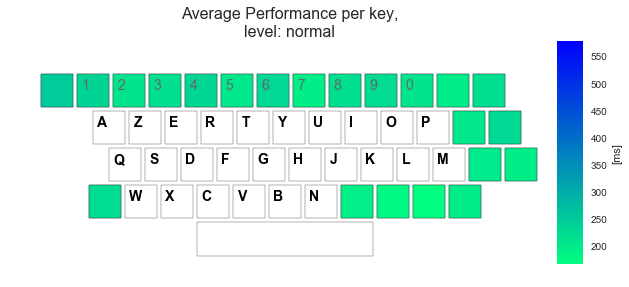

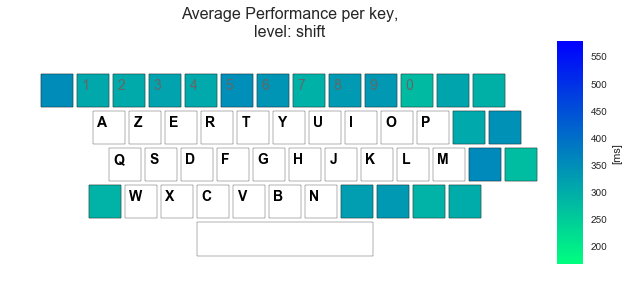

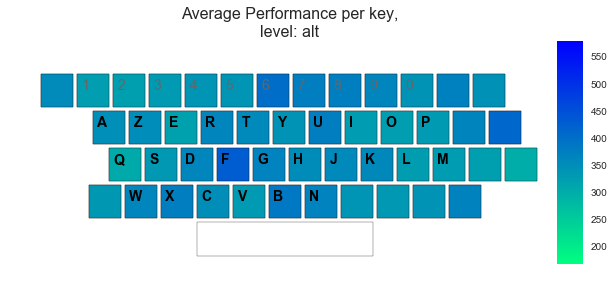

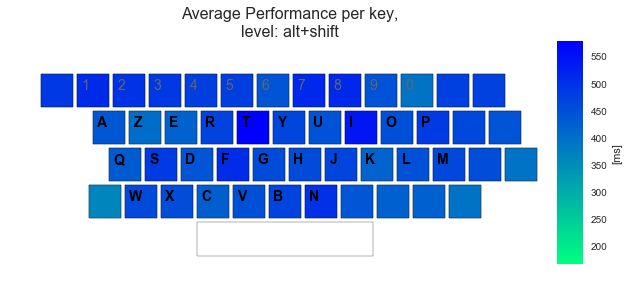

In [2]:
# performance per key as average of all performances to that key, normalized
performance = get_performance(normalize=0)
key_performance = {}
keyslots = get_keyslots() + ["E01_Shift", "E02_Shift", "E03_Shift", "E04_Shift", "E05_Shift", "E06_Shift", "E07_Shift",
                            "E08_Shift","E09_Shift","E10_Shift", "D03_Alt"] #+number keyslots+€
for key in keyslots:
    p = np.mean([v for (k1,k2),v in performance.iteritems() 
                 if (k1 == key and k2 not in keyslots) or (k1 not in keyslots and k2 == key)])
    if p>0.0:
        key_performance[key] = p*1000

key_performance_norm = normalize_dict_values(key_performance)

plot_keyboard_heatmap(key_performance, key_performance_norm, "", "Average Performance per key,\nlevel: normal", "[ms]")
plot_keyboard_heatmap(key_performance, key_performance_norm, "Shift", "Average Performance per key,\nlevel: shift", "[ms]")
plot_keyboard_heatmap(key_performance, key_performance_norm, "Alt", "Average Performance per key,\nlevel: alt")
plot_keyboard_heatmap(key_performance, key_performance_norm, "Alt_Shift", "Average Performance per key,\nlevel: alt+shift", "[ms]")

## Visualize Ergonomics

no values for B07
no values for B08
no values for B09
no values for B10
no values for E01_Shift
no values for E02_Shift
no values for E03_Shift
no values for E04_Shift
no values for E05_Shift
no values for E06_Shift
no values for E07_Shift
no values for E08_Shift
no values for E09_Shift
no values for E10_Shift


C:\Users\feita1\Python_Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


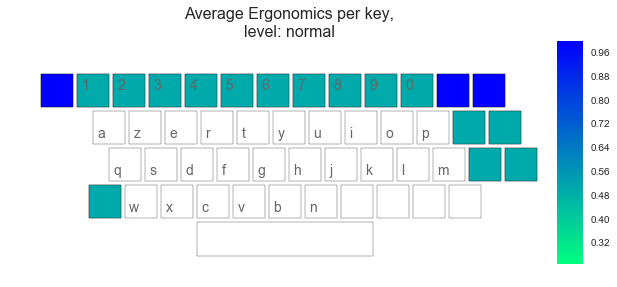

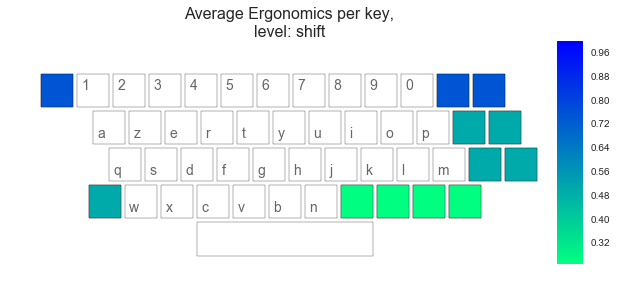

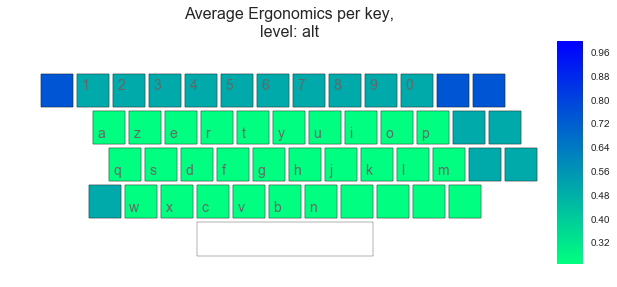

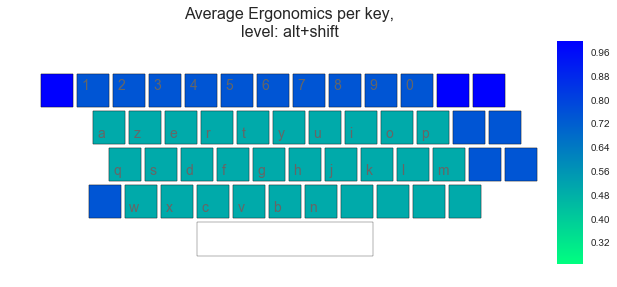

In [3]:
# performance per key as average of all performances to that key, normalized
ergonomics = get_ergonomics(normalize=0)
key_ergonomics = {}
keyslots = get_keyslots() + [u"E01_Shift", u"E02_Shift", u"E03_Shift", u"E04_Shift", u"E05_Shift", u"E06_Shift", u"E07_Shift",
                            u"E08_Shift",u"E09_Shift",u"E10_Shift", u"D03_Alt"] #+number keyslots+€
for key in keyslots:
    e = np.mean([v for (k1,k2),v in ergonomics.iteritems() 
                 if k1 not in keyslots and k2 == key])
    if e>0.0:
        key_ergonomics[key] = e
    else:
        print("no values for %s"%key)

key_ergonomics_norm = normalize_dict_values(key_ergonomics)

plot_keyboard_heatmap(key_ergonomics, key_ergonomics_norm, "", "Average Ergonomics per key,\nlevel: normal")
plot_keyboard_heatmap(key_ergonomics, key_ergonomics_norm, "Shift", "Average Ergonomics per key,\nlevel: shift")
plot_keyboard_heatmap(key_ergonomics, key_ergonomics_norm, "Alt", "Average Ergonomics per key,\nlevel: alt")
plot_keyboard_heatmap(key_ergonomics, key_ergonomics_norm, "Alt_Shift", "Average Ergonomics per key,\nlevel: alt+shift")

In [26]:
#Visualization algorithm: 
#(1) show only lower case characters 
#every character in old keyboard must be printed on new keyboard
#for each key: remove least frequeny character from mapping so that only 3-4 character for non-letter keys ar shown
corpus_weights = {"formal":0.5, "twitter":0.3,"code":0.2}
mapping = "mappings/solution_3_even.mst"
f_letter, f_bigram = get_probabilities(corpus_weights = corpus_weights)

mapping = get_mapping(mapping)
fixed = get_fixed_mapping()
letters = get_letters()

vis_mapping = mapping.copy()

#remove upper case characters if they are on the same key
capitals = {u"ß":u"ẞ"}
for c,s in mapping.iteritems():
    if (c.capitalize() != c and c.capitalize() in mapping):
        if mapping[c]+"_Shift" == mapping[c.capitalize()]:
            del vis_mapping[c.capitalize()]
    if (c in capitals and capitals[c] in mapping):
        if mapping[c]+"_Shift" == mapping[capitals[c]]:
            del vis_mapping[capitals[c]]
    
#remove least frequent character, if a key has more than four things mapped to it
for c,v in mapping.iteritems():
    #unmodified slot
    if v[4:] == "":
        chars_on_key = {c2:f_letter[c2] for c2,v2 in mapping.iteritems() if v2[:3] == v}
        if len(chars_on_key)==4:
            m = min(chars_on_key, key=chars_on_key.get)
            del vis_mapping[m]

weighting corpora
weighting corpora
weighting corpora


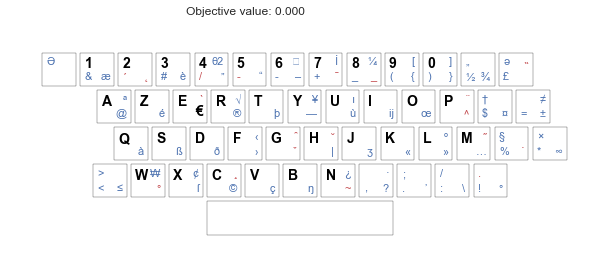

In [27]:
plot_mapping(vis_mapping, objective=0)

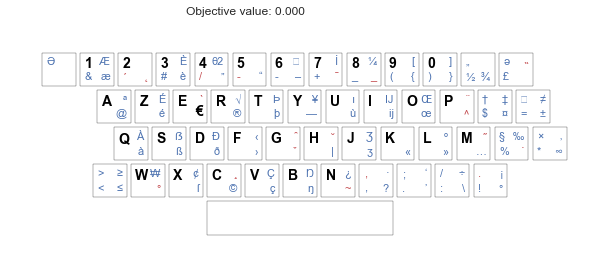

In [16]:
plot_mapping(mapping, objective=0)

In [31]:
u"ə" in mapping

True

In [30]:
u"Ə" in mapping

True

u'\xdf'

In [11]:
u"ẞ"

u'\u1e9e'